In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


In [2]:
# Load the SST anomalies data
sst_data = xr.open_dataset('../data/MODIS/processed/sst_anomaly_daily_2002_2025.nc')
anomalies = sst_data['sst'].values
original_shape = anomalies.shape

print("Original shape:", original_shape)

reshaped_data = anomalies.reshape(original_shape[0], -1)
print("Reshaped data shape:", reshaped_data.shape)

valid_points = ~np.isnan(reshaped_data).any(axis=0)
print("Number of valid points:", np.sum(valid_points))

cleaned_reshaped = np.copy(reshaped_data)
for i in range(cleaned_reshaped.shape[1]):
    column = cleaned_reshaped[:, i]
    if np.any(~np.isnan(column)):  # if there are any non-NaN values
        mean_val = np.nanmean(column)
        cleaned_reshaped[:, i] = np.where(np.isnan(column), mean_val, column)

valid_columns = ~np.isnan(cleaned_reshaped).all(axis=0)
clean_data = cleaned_reshaped[:, valid_columns]
print("Clean data shape:", clean_data.shape)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data.T)
print("Scaled data shape:", scaled_data.shape)

# Perform K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Reshape clusters back to spatial grid
spatial_clusters = np.full(original_shape[1] * original_shape[2], np.nan)
spatial_clusters[valid_columns] = clusters
spatial_clusters = spatial_clusters.reshape(original_shape[1], original_shape[2])


Original shape: (8266, 396, 408)
Reshaped data shape: (8266, 161568)
Number of valid points: 0
Clean data shape: (8266, 82521)
Scaled data shape: (82521, 8266)


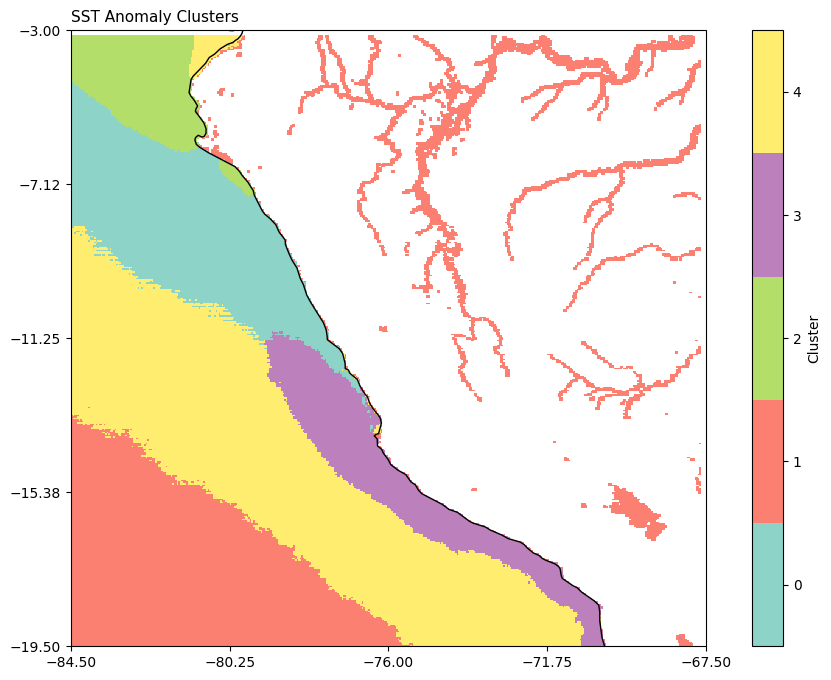

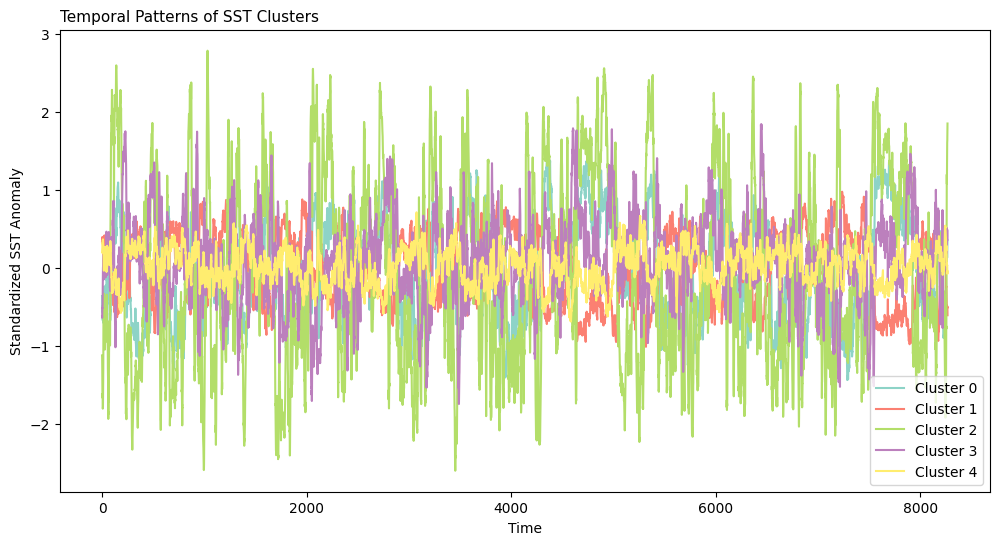

In [3]:
# Create a custom colormap with exactly n_clusters colors
colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))  # Get n_clusters colors from Set3
custom_cmap = ListedColormap(colors)

# Plot the results using cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# Plot with the custom colormap
im = ax.pcolormesh(sst_data.lon, sst_data.lat, spatial_clusters, 
                   transform=ccrs.PlateCarree(), 
                   cmap=custom_cmap,
                   vmin=-0.5,
                   vmax=n_clusters-0.5)


lon = sst_data['lon']
lat = sst_data['lat']
lon_min, lon_max = np.round(lon.min().values * 2) / 2, np.round(lon.max().values * 2) / 2
lat_min, lat_max = np.round(lat.min().values * 2) / 2, np.round(lat.max().values * 2) / 2
lon_ticks = np.linspace(lon_min, lon_max, num=min(5, int((lon_max - lon_min) / 0.5) + 1))
lat_ticks = np.linspace(lat_min, lat_max, num=min(5, int((lat_max - lat_min) / 0.5) + 1))

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())

plt.colorbar(im, label='Cluster', ticks=range(n_clusters))
plt.title('SST Anomaly Clusters', fontsize=11, loc='left')
plt.show()

# Analyze temporal patterns
cluster_means = []
for i in range(n_clusters):
    cluster_mask = clusters == i
    cluster_means.append(scaled_data[cluster_mask].mean(axis=0))

# Plot temporal patterns
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    plt.plot(cluster_means[i], label=f'Cluster {i}', color=colors[i])
plt.title('Temporal Patterns of SST Clusters', fontsize=11, loc='left')
plt.xlabel('Time')
plt.ylabel('Standardized SST Anomaly')
plt.legend()
plt.show()

In [4]:
# Load the SST anomalies data
sst_data_climaatology = xr.open_dataset('../data/MODIS/processed/sst_climatology_daily_2003_2023.nc')

climatologies = sst_data_climaatology['sst'].values
original_shape = climatologies.shape

print("Original shape:", original_shape)

reshaped_data = climatologies.reshape(original_shape[0], -1)
print("Reshaped data shape:", reshaped_data.shape)

valid_points = ~np.isnan(reshaped_data).any(axis=0)
print("Number of valid points:", np.sum(valid_points))

cleaned_reshaped = np.copy(reshaped_data)
for i in range(cleaned_reshaped.shape[1]):
    column = cleaned_reshaped[:, i]
    if np.any(~np.isnan(column)):  # if there are any non-NaN values
        mean_val = np.nanmean(column)
        cleaned_reshaped[:, i] = np.where(np.isnan(column), mean_val, column)

valid_columns = ~np.isnan(cleaned_reshaped).all(axis=0)
clean_data = cleaned_reshaped[:, valid_columns]
print("Clean data shape:", clean_data.shape)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data.T)
print("Scaled data shape:", scaled_data.shape)

# Perform K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Reshape clusters back to spatial grid
spatial_clusters = np.full(original_shape[1] * original_shape[2], np.nan)
spatial_clusters[valid_columns] = clusters
spatial_clusters = spatial_clusters.reshape(original_shape[1], original_shape[2])


Original shape: (366, 396, 408)
Reshaped data shape: (366, 161568)
Number of valid points: 6527
Clean data shape: (366, 82521)
Scaled data shape: (82521, 366)


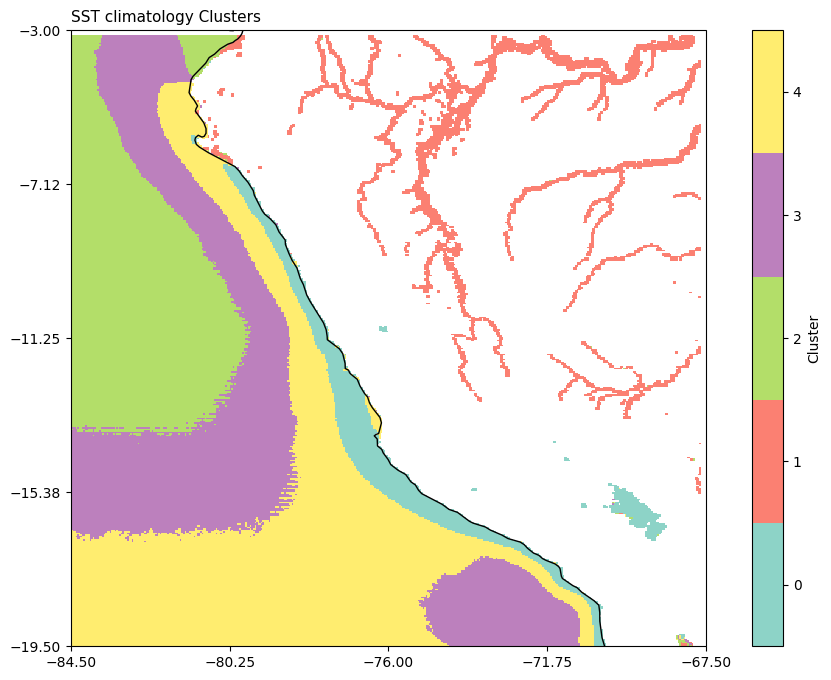

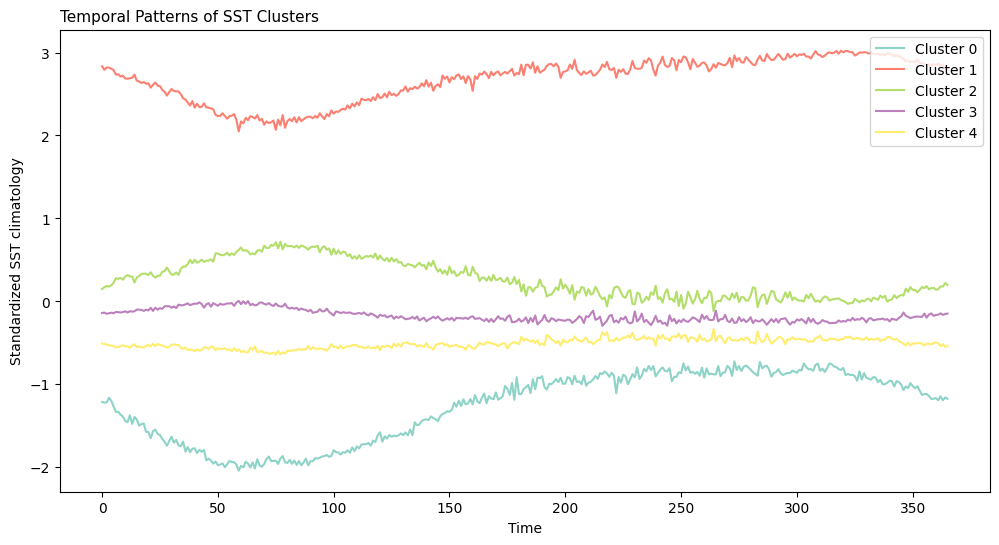

In [5]:
# Create a custom colormap with exactly n_clusters colors
colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))  # Get n_clusters colors from Set3
custom_cmap = ListedColormap(colors)

# Plot the results using cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# Plot with the custom colormap
im = ax.pcolormesh(sst_data_climaatology.lon, sst_data_climaatology.lat, spatial_clusters, 
                   transform=ccrs.PlateCarree(), 
                   cmap=custom_cmap,
                   vmin=-0.5,
                   vmax=n_clusters-0.5)

lon = sst_data['lon']
lat = sst_data['lat']
lon_min, lon_max = np.round(lon.min().values * 2) / 2, np.round(lon.max().values * 2) / 2
lat_min, lat_max = np.round(lat.min().values * 2) / 2, np.round(lat.max().values * 2) / 2
lon_ticks = np.linspace(lon_min, lon_max, num=min(5, int((lon_max - lon_min) / 0.5) + 1))
lat_ticks = np.linspace(lat_min, lat_max, num=min(5, int((lat_max - lat_min) / 0.5) + 1))

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
plt.colorbar(im, label='Cluster', ticks=range(n_clusters))
plt.title('SST climatology Clusters', fontsize=11, loc='left')
plt.show()

# Analyze temporal patterns
cluster_means = []
for i in range(n_clusters):
    cluster_mask = clusters == i
    cluster_means.append(scaled_data[cluster_mask].mean(axis=0))

# Plot temporal patterns
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    plt.plot(cluster_means[i], label=f'Cluster {i}', color=colors[i])
plt.title('Temporal Patterns of SST Clusters', fontsize=11, loc='left')
plt.xlabel('Time')
plt.ylabel('Standardized SST climatology')
plt.legend()
plt.show()